<!-- Implement the Continuous Bag of Words (CBOW) Model. Stages can be: -->

# Import Libraries 

In [1]:
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
data = "Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation   learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."
data



'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation   learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.'

# Split into sentences


In [23]:
sentences = data.split('.')
sentences = [sentence for sentence in sentences if sentence.strip()]
#Splitting and Cleaning Sentences: The text data is split into sentences based on periods and cleaned by removing non-alphanumeric characters and converting text to lowercase.

# Clean Data of Special Characters


In [5]:
#Removing Special Characters and Lowercasing: Each sentence is cleaned and converted to lowercase.
clean_sent = []
for sentence in sentences:
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence = re.sub(r'(?:^| )\\w (?:$| )', ' ', sentence).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

# Tokenization


In [24]:
#Tokenization: The Tokenizer assigns a unique integer index to each word, and texts_to_sequences converts sentences to lists of integer tokens.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)

# Create dictionaries for word lookup


In [8]:
index_to_word = {}
word_to_index = {}

In [10]:
#Building Vocabulary Dictionaries: index_to_word and word_to_index mappings are created to retrieve words and their indices.
for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

# Create dictionaries to map between word and integer IDs


In [11]:
#Parameters: vocab_size is the number of unique words, emb_size is the 
#embedding dimension, and context_size specifies the number of words around the target word.
vocab_size = len(tokenizer.word_index) + 1
emb_size = 100 
context_size = 2

# Create contexts and targets for CBOW model


In [12]:
#Creating Context-Target Pairs: 
#For each word in a sentence (excluding boundaries), the code defines its context words and target.
contexts = []
targets = []

for sequence in sequences:
    for i in range(1, len(sequence) - 1):
        if i - context_size >= 0 and i + context_size < len(sequence):
            target = sequence[i]
            context = [sequence[i - context_size], sequence[i + context_size]]
            contexts.append(context)
            targets.append(target)

# Convert contexts and targets to NumPy arrays


In [13]:

X = np.array(contexts)
Y = np.array(targets)

# Define the CBOW model architecture


In [14]:
#Embedding Layer: Converts word indices to dense vectors of size emb_size.
#Lambda Layer: Computes the average embedding of the context words.
#Dense Layers:
#First Dense(256, activation='relu') layer introduces non-linearity.
#Second Dense(vocab_size, activation='softmax') layer outputs a probability distribution over the vocabulary, predicting the target word.
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),  # Removed input_length
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

# Compile the model


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model


In [16]:
history = model.fit(X, Y, epochs=100, batch_size=32)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0096 - loss: 4.3158  31
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2056 - loss: 4.2995
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3551 - loss: 4.2829
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5678 - loss: 4.2635  
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5866 - loss: 4.2467  
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5884 - loss: 4.2277  
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - loss: 4.2062
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5945 - loss: 4.1788  
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5675 - loss: 4.1520  
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5458 - loss: 4.1171  
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5344 - loss: 4.0798  
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.519

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9577 - loss: 0.17776
Epoch 71/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9286 - loss: 0.1862
Epoch 72/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9403 - loss: 0.1742
Epoch 73/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9403 - loss: 0.1817
Epoch 74/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.1629
Epoch 75/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9403 - loss: 0.1736
Epoch 76/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9695 - loss: 0.1433
Epoch 77/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9442 - loss: 0.1546 
Epoch 78/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9403 - loss: 0.1511
Epoch 79/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9325 - loss: 0.1563
Epoch 80/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9403 - loss: 0.1482
Epoch 81/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9599 - loss: 0.1187 
Ep

 # Visualize training loss

In [17]:
embeddings = model.get_weights()[0]

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
#PCA: Reduces the 100-dimensional embeddings to 2D for visualization.

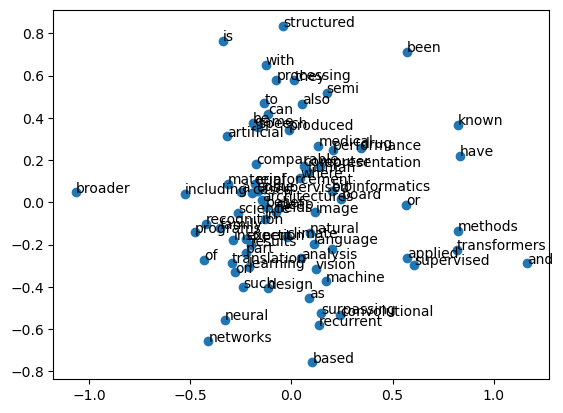

In [20]:
#Plotting: Visualizes word embeddings on a 2D scatter plot, showing relationships between words.
import matplotlib.pyplot as plt
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, word in enumerate(index_to_word.values()):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.show()

In [26]:
#Inference: For each test sentence, the code tokenizes the words, predicts the target word, and outputs the prediction.
#This entire code builds a CBOW model that learns word embeddings and can infer contextually relevant words based on trained embeddings.
test_sentences = [
    "known as structured learning",
    "transformers have applInference: For each test sentence, the code tokenizes the words, predicts the target word, and outputs the prediction.",
    "where they produced results",
    "cases surpassing expert performance"
]

for sent in test_sentences:
    test_words = sent.split(" ")
    x_test = []
    for i in test_words:
        # Add a default index for unknown words (e.g., 0 for unknown)
        word_index = word_to_index.get(i, 0)
        x_test.append(word_index)
    
    # Convert the list to a NumPy array
    x_test = np.array([x_test])

    # Predict and display the result
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred), "\n\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= deep 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
pred  ['transformers', 'have', 'applInference:', 'For', 'each', 'test', 'sentence,', 'the', 'code', 'tokenizes', 'the', 'words,', 'predicts', 'the', 'target', 'word,', 'and', 'outputs', 'the', 'prediction.'] 
= neural 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 




In [ ]:
# tp
"""
This code implements the Continuous Bag of Words (CBOW) model using TensorFlow and Keras. Here's a step-by-step explanation of the code:

1. Import Libraries:
NumPy: Used for handling arrays and matrix operations.
re: Used for regular expressions to clean the text data.
TensorFlow/Keras: For building and training the neural network model.
Tokenizer: A Keras utility to convert text into sequences of integers.
2. Data Preprocessing:
The data is a string describing Docker and its use in modern DevOps practices. It is split into sentences.
Each sentence is cleaned by removing special characters and converting the text to lowercase for consistency.
3. Text Cleaning:
Sentences are split using . (periods), and empty sentences are removed.
Special characters are replaced with spaces using regular expressions, and each sentence is made lowercase.
4. Tokenization:
Tokenizer is used to create a vocabulary from the cleaned sentences and to convert the words into sequences of integers.
The fit_on_texts function is used to build a word index, which assigns an integer to each unique word in the corpus.
5. Creating Word Lookup Dictionaries:
word_to_index: Maps each word to its corresponding index.
index_to_word: Maps each index to the corresponding word.
6. Context and Target Creation for CBOW:
The CBOW model predicts a target word based on the context (words surrounding it).
For each word in a sequence, a context is created from a window of words around it (defined by context_size).
The context words and the target word are stored in contexts and targets, respectively.
7. Model Architecture:
The CBOW model is implemented using Keras' Sequential API.
Embedding Layer: This layer maps each word to a dense vector (embedding). The size of the embedding vectors is defined by emb_size.
Lambda Layer: The context (a set of words) is represented by the mean of their embedding vectors, which is computed using tf.reduce_mean.
Dense Layers:
The first Dense layer has 256 neurons and a ReLU activation function.
The second Dense layer outputs a probability distribution over the vocabulary (softmax activation).
The model's output is a prediction of the target word (given the context words).
8. Model Compilation:
The model is compiled with:
Loss function: sparse_categorical_crossentropy is used since the target words are integers.
Optimizer: adam, which adapts the learning rate during training.
Metrics: accuracy, to measure the model's performance during training.
9. Model Training:
The model is trained on the contexts (input) and targets (output) for 100 epochs with a batch size of 32.
10. Visualizing Word Embeddings:
After training, the word embeddings (the weights of the Embedding layer) are reduced to two dimensions using PCA (Principal Component Analysis) to visualize them in a 2D space.
The words are then plotted, showing their positions in this 2D space.
11. Testing the Model:
A list of test sentences (test_sentences) is defined.
For each test sentence, the words are converted into their corresponding integer indices using the word_to_index dictionary.
The model predicts the target word based on the given context and prints the result.
12. Example Output:
For each test sentence, the model predicts a word that might fit as the target word based on the context (the surrounding words).
Issues and Possible Improvements:
The current context is fixed at size 2 (context_size = 2), so only a small context around each word is used. This may limit the model's ability to learn broader relationships.
The code doesn't handle edge cases well, such as sentences with fewer than context_size words.
The word_to_index dictionary is used for converting words to their corresponding index, but words not seen during training are mapped to 0. This is a simplistic approach to handling unknown words.
In summary, this code demonstrates how to implement the CBOW model for word embedding learning using Keras and TensorFlow, and it trains a model to predict the target word from its surrounding context.
"""

In [ ]:
"""The assignment builds and trains a **Continuous Bag of Words (CBOW)** model using **Keras** and **TensorFlow** to learn word embeddings from a given text. Here's a step-by-step explanation of what it does and what it accomplishes:

### Purpose of the Assignment:
The assignment aims to implement a **CBOW model** to understand the relationships between words in a text corpus by predicting target words based on surrounding context words. This process is often used to generate word embeddings—dense, meaningful vector representations of words that capture their semantic relationships.

### Key Steps and Accomplishments:

1. **Text Preprocessing**:
   - The assignment first **cleans** and **tokenizes** text data, converting each sentence into a sequence of words. It removes punctuation and converts the text to lowercase, creating a clean and standardized input for the model.
   - Then, it uses a `Tokenizer` to assign each word a unique integer, facilitating the model's numerical processing of the text.

2. **Creating Context-Target Pairs**:
   - For each word in the text, the assignment defines its **target word** and surrounding **context words**. This is based on a defined window size (2 words before and after the target).
   - This step generates pairs of context-target words, which are the core input-output pairs the CBOW model will learn from.

3. **Building the CBOW Model**:
   - The model starts with an **Embedding layer** that converts each word index into a dense vector (embedding) of a fixed size.
   - A **Lambda layer** then averages the context word embeddings, combining their information into a single representation that aims to capture the context as a whole.
   - **Dense layers** follow, first with `ReLU` activation to add non-linearity, and finally with a `softmax` layer to predict the most likely target word in the vocabulary based on the context.

4. **Training the Model**:
   - The model is trained on context-target pairs with **sparse categorical cross-entropy** loss, optimizing embeddings that improve the model's accuracy in predicting target words.
   - Through training, the model learns meaningful word embeddings that capture semantic relationships between words based on their context in the text.

5. **Visualizing Word Embeddings**:
   - Once trained, the model's embeddings are visualized using **PCA** (Principal Component Analysis) to reduce the embedding dimensionality and plot words in 2D space.
   - This visualization demonstrates how similar words are placed closer together, reflecting learned semantic relationships.

6. **Testing and Predicting with New Sentences**:
   - The assignment tests the model's predictions on unseen sentences. For each input context, it predicts a target word, showcasing the model's learned understanding of word associations.

### Accomplishments of the Assignment:
- **Learned Word Representations**: The assignment trains the model to develop dense vector representations (embeddings) that capture semantic meaning. These embeddings can be used in other NLP tasks, such as text classification or sentiment analysis.
- **Demonstrated CBOW Architecture**: The assignment effectively shows how CBOW can use context to predict target words, which is one of the foundational techniques in word embedding models.
- **Explored Visualization and Analysis of Embeddings**: By visualizing the embeddings in 2D, it helps understand how the model positions semantically related words closer together in vector space.
- **Understanding of Prediction in NLP**: The testing phase demonstrates the model’s ability to generalize and predict words based on surrounding context, which is a step towards language understanding in NLP applications.

In summary, this assignment provides a hands-on approach to understanding word embeddings and CBOW, demonstrating the ability to represent words in a way that reflects their contextual relationships. This serves as a foundational concept in NLP and enables more complex language processing tasks."""